Link
https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast

In [1]:
# Additional Information

# This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the 
# LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data 
# from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum 
# temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) 
# in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Bias_correction_ucl.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## EDA

In [4]:
#eda
df.shape

(7752, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
#drop rows with null values
df.dropna(inplace=True)

In [9]:
#drop station column
df.drop('station',axis=1,inplace=True)

df.head()

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [10]:
#convert date column to datetime
df['Date']=pd.to_datetime(df['Date'])

df.head()

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [11]:
#extract year,month,day from date column
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

#drop date column
df.drop('Date',axis=1,inplace=True)

df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


array([[<AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmax'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>],
       [<AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>,
        <AxesSubplot:title={'center':'LDAPS_CC1'}>,
        <AxesSubplot:title={'center':'LDAPS_CC2'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT2'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT3'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'DEM'}>,
 

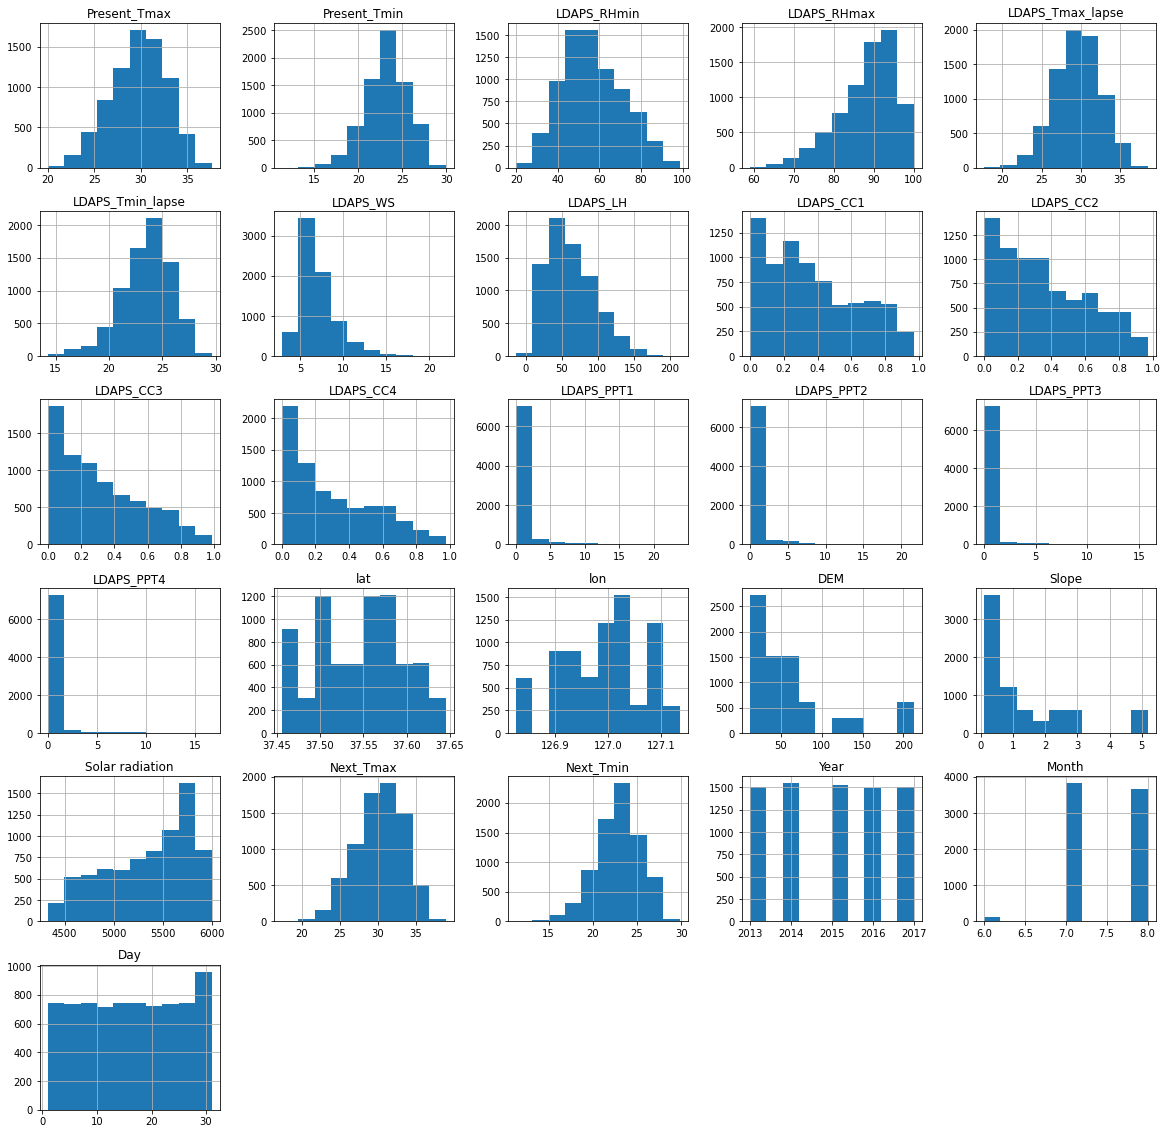

In [12]:
#Histogram of all columns
df.hist(figsize=(20,20))

<AxesSubplot:>

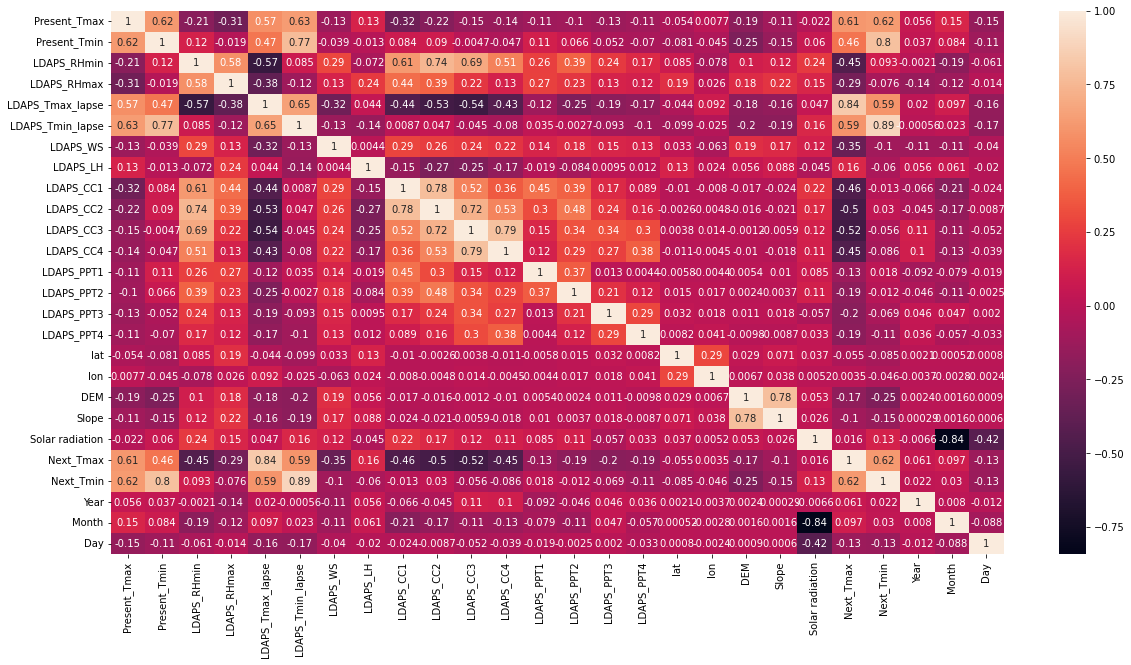

In [13]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
#high correlation we apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=0.99)
y1=df['Next_Tmax']
y2=df['Next_Tmin']
df.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
x=pca.fit_transform(df)
x.shape

(7588, 2)

### Fitting the models

In [15]:
#predict y1 and y2 using catboost
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(x,y1, verbose=False)

#cat.fit(x,y2)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y1_pred=cat.predict(x)

print('r2_score of y1:',r2_score(y1,y1_pred))

print('mean_squared_error of y1:',mean_squared_error(y1,y1_pred))

print('mean_absolute_error of y1:',mean_absolute_error(y1,y1_pred))

print("------------------------------------------------------")
#predict y2
cat=CatBoostRegressor()
cat.fit(x,y2, verbose=False)

y2_pred=cat.predict(x)

print('r2_score of y2:',r2_score(y2,y2_pred))

print('mean_squared_error of y2:',mean_squared_error(y2,y2_pred))

print('mean_absolute_error of y2:',mean_absolute_error(y2,y2_pred))

r2_score of y1: 0.39932377858950996
mean_squared_error of y1: 5.815787478936111
mean_absolute_error of y1: 1.9467345888476044
------------------------------------------------------
r2_score of y2: 0.5371336435216482
mean_squared_error of y2: 2.851617978407643
mean_absolute_error of y2: 1.3467445699183478


In [16]:
#predict y1 and y2 using linear regression
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x,y1)

y1_pred=lr1.predict(x)

print('r2_score of y1:',r2_score(y1,y1_pred))

print('mean_squared_error of y1:',mean_squared_error(y1,y1_pred))

print('mean_absolute_error of y1:',mean_absolute_error(y1,y1_pred))

print("------------------------------------------------------")

lr2=LinearRegression()
lr2.fit(x,y2)

y2_pred=lr2.predict(x)

print('r2_score of y2:',r2_score(y2,y2_pred))

print('mean_squared_error of y2:',mean_squared_error(y2,y2_pred))

print('mean_absolute_error of y2:',mean_absolute_error(y2,y2_pred))


r2_score of y1: 0.030721065377067203
mean_squared_error of y1: 9.38462368019108
mean_absolute_error of y1: 2.498449850433035
------------------------------------------------------
r2_score of y2: 0.08261636934247496
mean_squared_error of y2: 5.651799094199724
mean_absolute_error of y2: 1.8905874185489588


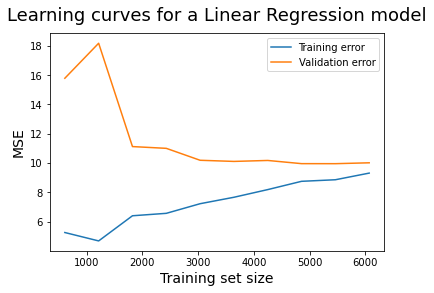

In [17]:
# Learning curves: Plot the training and validation performance as a function of the training set size.
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr1,
                                                        X=x,
                                                        y=y1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)

test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')

plt.plot(train_sizes, test_mean, label='Validation error')

plt.ylabel('MSE', fontsize=14)

plt.xlabel('Training set size', fontsize=14)

plt.title('Learning curves for a Linear Regression model', fontsize=18, y=1.03)

plt.legend()

In [18]:
#predict y1 and y2 using ridge regression
from sklearn.linear_model import Ridge
ridge1=Ridge()
ridge1.fit(x,y1)

y1_pred=ridge1.predict(x)

print('r2_score of y1:',r2_score(y1,y1_pred))

print('mean_squared_error of y1:',mean_squared_error(y1,y1_pred))

print('mean_absolute_error of y1:',mean_absolute_error(y1,y1_pred))

print("------------------------------------------------------")

ridge2=Ridge()

ridge2.fit(x,y2)

y2_pred=ridge2.predict(x)

print('r2_score of y2:',r2_score(y2,y2_pred))

print('mean_squared_error of y2:',mean_squared_error(y2,y2_pred))

print('mean_absolute_error of y2:',mean_absolute_error(y2,y2_pred))

r2_score of y1: 0.030721065377067203
mean_squared_error of y1: 9.38462368019108
mean_absolute_error of y1: 2.4984498503019967
------------------------------------------------------
r2_score of y2: 0.08261636934247496
mean_squared_error of y2: 5.651799094199724
mean_absolute_error of y2: 1.8905874181430857


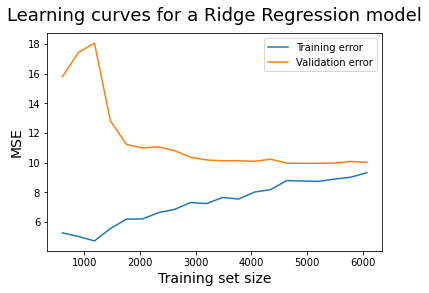

In [19]:
# Learning curves: Plot the training and validation performance as a function of the training set size.
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=ridge1,
                                                        X=x,
                                                        y=y1,   
                                                        train_sizes=np.linspace(0.1, 1.0, 20),
                                                        cv=5,
                                                        scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)

test_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')

plt.plot(train_sizes, test_mean, label='Validation error')

plt.ylabel('MSE', fontsize=14)

plt.xlabel('Training set size', fontsize=14)

plt.title('Learning curves for a Ridge Regression model', fontsize=18, y=1.03)

plt.legend()